# Multiple Linear Regressions of Housing Data to Predict Price

-In this project I will be using multiple linear regressions to predict housing price data.

# STEPS

-Load and clean the data

-Perform exploratory data analysis on the data to identify the most useful data points

-Fit a multiple linear regression model

-Evaluate and refine the model and adjust to improve R^2 and RMSE values

-Create visualizations of the results

In [25]:
# Importing necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Load Datasets
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

#Print info for the size and preview of the first few entries of the data set
print("Training set shape: ", train.shape)
train.head()

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
Training set shape:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis
-In this cell I will clean the data by deleting columns with few entries. Then I will find features which correlate with sale price and select the five best to build my initial Multiple Regression Model.

In [37]:
#Output basic info about the data
train.shape
train.columns
train.info()
train.describe()

#Print the 20 columns with the most missing data
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

#Drop all columns with 25% or greater missing data
missing_percent = train.isnull().mean()
columns_to_drop = missing_percent[missing_percent >= .25].index
train = train.drop(columns=columns_to_drop)

#Find the values with the highest correlation coefficients, the top 5 will be used in the initial model
corr = train.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(15)
print("Top correlated Values:\n", top_corr)
#Top 5 correlated Values: OverallQual(0.790982),GrLivArea(0.708624),GarageCars(0.640409), GarageArea 0.623431,TotalBsmtSF(0.613581)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Cell 3: Building the Model
I will now build my initial multiple regressions model using the 5 data points with the highest correlation to sales price; OverallQual(0.790982),GrLivArea(0.708624),GarageCars(0.640409), GarageArea 0.623431,TotalBsmtSF(0.613581)

Intercept: -99072.05038623794
OverallQual: 23635.007412091396
GrLivArea: 45.34582303089644
GarageCars: 14544.315409404491
GarageArea: 17.133392823620973
TotalBsmtSF: 31.501475321708604
R-squared: 0.761
RMSE: 38815.45


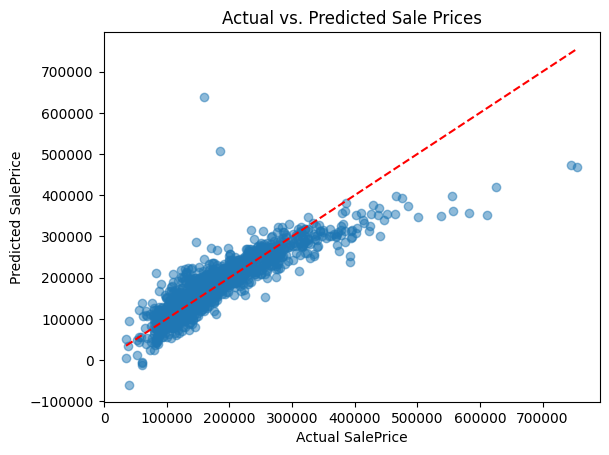

In [44]:
#Assign X and y for the model
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X = train[features]
y = train['SalePrice']

#Create and fit the model
model = LinearRegression()
model.fit(X, y)

#Print Regression Line information
print("Intercept:", model.intercept_)
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

#Make Predictions
y_pred = model.predict(X)

#Calculate and Print Test Statistics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

#Create a plot with a scatter of actual sales price and the predicted regression line
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()

# Conclusion
The final test statistics were an R-squared value of .761 and Root Mean Squared Error of 38815.45. These means the model explains 76.1% of the variability of the data and predicts housing prices on average within $38,815.45.

An R-squared value of .761 is considered moderately strong. Future improvments can be made by adding more relevant predictors, increasing sample sizes by incorporating more data sets, selecting predictor variables with more variance, and reassessing predictor variables with high multicollinearity.